In [1]:
%load_ext autoreload
%autoreload 2

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import time

In [3]:
df = pd.read_excel('Sentiment_DB.xlsx', engine='openpyxl')

In [4]:
df

,Reported_Date,Bullish,Neutral,Bearish,Bearish_8-week_MA,Bullish_8-week_MA,Bull-Bear_Spread,S&P500_Intraweek_spread,S&P500_Weekly_High,S&P500_Weekly_Low,S&P500_Weekly_return,S&P500_1_Week_forward,S&P500_4_Week_forward,S&P500_8_Week_forward,S&P500_Weekly_High.1,S&P500_Weekly_Low.1,S&P500_Weekly_Close
0,1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1987-07-17,NaN,NaN,NaN,NaN,NaN,NaN,0.022124,0.000000,-0.022124,NaN,-0.016911,0.026733,0.026860,314.59,307.63,314.59
2,1987-07-24,0.360000,0.500000,0.140000,NaN,NaN,0.220000,0.011576,0.006855,-0.004721,-0.016911,0.030362,0.079930,0.024024,311.39,307.81,309.27
3,1987-07-31,0.260000,0.480000,0.260000,NaN,NaN,0.000000,0.025137,0.000000,-0.025137,0.030362,0.013620,0.054102,0.010419,318.66,310.65,318.66
4,1987-08-07,0.560000,0.150000,0.290000,NaN,NaN,0.270000,0.020960,0.000000,-0.020960,0.013620,0.034025,0.000124,-0.025201,323.00,316.23,323.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,2022-02-24,0.233945,0.229358,0.536697,0.434098,0.244073,-0.302752,0.066253,0.040019,-0.026234,-0.055756,0.038111,0.031324,NaN,4394.60,4114.65,4225.50
1805,2022-03-03,0.303867,0.281768,0.414365,0.444227,0.241108,-0.110498,0.031287,0.006894,-0.024393,0.038111,-0.024771,0.015890,NaN,4416.78,4279.54,4386.54
1806,2022-03-10,0.240000,0.302222,0.457778,0.453587,0.239974,-0.217778,0.043070,0.015017,-0.028054,-0.024771,0.018696,NaN,NaN,4342.12,4157.87,4277.88
1807,2022-03-17,0.224670,0.277533,0.497797,0.457405,0.241857,-0.273127,0.048246,0.003238,-0.045008,0.018696,0.022575,NaN,NaN,4371.97,4161.72,4357.86


In [5]:
ma_period = 4
df[f'Bearish_{ma_period}-week_MA'] = df['Bearish'].rolling(ma_period, min_periods=ma_period, center=False).mean()
df[f'Bullish_{ma_period}-week_MA'] = df['Bullish'].rolling(ma_period, min_periods=ma_period, center=False).mean()
df[f'Bull-Bear_Spread_{ma_period}-week_MA'] = df['Bull-Bear_Spread'].rolling(ma_period, min_periods=ma_period, center=False).mean()
df[f'S&P500_Intraweek_spread_{ma_period}-week_MA'] = df['S&P500_Intraweek_spread'].rolling(ma_period, min_periods=ma_period, center=False).mean()
df[f'S&P500_Weekly_High_{ma_period}-week_MA'] = df['S&P500_Weekly_High'].rolling(ma_period, min_periods=ma_period, center=False).mean()
df[f'S&P500_Weekly_Low_{ma_period}-week_MA'] = df['S&P500_Weekly_Low'].rolling(ma_period, min_periods=ma_period, center=False).mean()
# df['Percentage_with_opinion'] = 1-df['Neutral']

In [6]:
df

,Reported_Date,Bullish,Neutral,Bearish,Bearish_8-week_MA,Bullish_8-week_MA,Bull-Bear_Spread,S&P500_Intraweek_spread,S&P500_Weekly_High,S&P500_Weekly_Low,...,S&P500_8_Week_forward,S&P500_Weekly_High.1,S&P500_Weekly_Low.1,S&P500_Weekly_Close,Bearish_4-week_MA,Bullish_4-week_MA,Bull-Bear_Spread_4-week_MA,S&P500_Intraweek_spread_4-week_MA,S&P500_Weekly_High_4-week_MA,S&P500_Weekly_Low_4-week_MA
0,1987-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1987-07-17,NaN,NaN,NaN,NaN,NaN,NaN,0.022124,0.000000,-0.022124,...,0.026860,314.59,307.63,314.59,NaN,NaN,NaN,NaN,NaN,NaN
2,1987-07-24,0.360000,0.500000,0.140000,NaN,NaN,0.220000,0.011576,0.006855,-0.004721,...,0.024024,311.39,307.81,309.27,NaN,NaN,NaN,NaN,NaN,NaN
3,1987-07-31,0.260000,0.480000,0.260000,NaN,NaN,0.000000,0.025137,0.000000,-0.025137,...,0.010419,318.66,310.65,318.66,NaN,NaN,NaN,NaN,NaN,NaN
4,1987-08-07,0.560000,0.150000,0.290000,NaN,NaN,0.270000,0.020960,0.000000,-0.020960,...,-0.025201,323.00,316.23,323.00,NaN,NaN,NaN,0.019949,0.001714,-0.018235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,2022-02-24,0.233945,0.229358,0.536697,0.434098,0.244073,-0.302752,0.066253,0.040019,-0.026234,...,NaN,4394.60,4114.65,4225.50,0.439972,0.233737,-0.206236,0.047868,0.013350,-0.034518
1805,2022-03-03,0.303867,0.281768,0.414365,0.444227,0.241108,-0.110498,0.031287,0.006894,-0.024393,...,NaN,4416.78,4279.54,4386.54,0.434422,0.243473,-0.190950,0.039192,0.014751,-0.024442
1806,2022-03-10,0.240000,0.302222,0.457778,0.453587,0.239974,-0.217778,0.043070,0.015017,-0.028054,...,NaN,4342.12,4157.87,4277.88,0.460191,0.242575,-0.217616,0.044174,0.018349,-0.025825
1807,2022-03-17,0.224670,0.277533,0.497797,0.457405,0.241857,-0.273127,0.048246,0.003238,-0.045008,...,NaN,4371.97,4161.72,4357.86,0.476659,0.250620,-0.226039,0.047214,0.016292,-0.030922


In [7]:
df.dropna(inplace=True)
df

,Reported_Date,Bullish,Neutral,Bearish,Bearish_8-week_MA,Bullish_8-week_MA,Bull-Bear_Spread,S&P500_Intraweek_spread,S&P500_Weekly_High,S&P500_Weekly_Low,...,S&P500_8_Week_forward,S&P500_Weekly_High.1,S&P500_Weekly_Low.1,S&P500_Weekly_Close,Bearish_4-week_MA,Bullish_4-week_MA,Bull-Bear_Spread_4-week_MA,S&P500_Intraweek_spread_4-week_MA,S&P500_Weekly_High_4-week_MA,S&P500_Weekly_Low_4-week_MA
9,1987-09-11,0.500000,0.230000,0.270000,0.241250,0.466250,0.230000,0.026151,0.000000,-0.026151,...,-0.229083,321.98,313.56,321.98,0.260000,0.525000,0.265000,0.028274,0.016787,-0.011487
10,1987-09-18,0.600000,0.290000,0.110000,0.237500,0.496250,0.490000,0.026107,0.026107,0.000000,...,-0.200311,323.08,314.86,314.86,0.272500,0.510000,0.237500,0.029852,0.023314,-0.006538
11,1987-09-25,0.530000,0.170000,0.300000,0.242500,0.530000,0.230000,0.033265,0.003217,-0.030047,...,-0.217860,321.19,310.54,320.16,0.272500,0.512500,0.240000,0.031714,0.017664,-0.014050
12,1987-10-02,0.440000,0.260000,0.300000,0.243750,0.515000,0.140000,0.019447,0.000000,-0.019447,...,-0.251257,328.07,321.69,328.07,0.245000,0.517500,0.272500,0.026242,0.007331,-0.018911
13,1987-10-09,0.460000,0.390000,0.150000,0.237500,0.516250,0.310000,0.054682,0.054682,0.000000,...,-0.222040,328.08,311.07,311.07,0.215000,0.507500,0.292500,0.033375,0.021002,-0.012374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,2022-01-13,0.249071,0.368030,0.382900,0.354970,0.300413,-0.133829,0.023392,0.004756,-0.018636,...,-0.105970,4748.83,4638.27,4726.35,0.340095,0.312231,-0.027864,0.027714,0.009540,-0.018174
1799,2022-01-20,0.209607,0.323144,0.467249,0.368733,0.284352,-0.257642,0.012081,0.015300,0.003219,...,-0.032258,4602.11,4547.35,4532.76,0.372230,0.290708,-0.081522,0.020582,0.012020,-0.008562
1800,2022-01-27,0.231373,0.239216,0.529412,0.381933,0.279940,-0.298039,0.053015,0.023748,-0.029267,...,-0.016563,4453.23,4222.62,4349.93,0.428223,0.254409,-0.173814,0.028461,0.017229,-0.011232
1801,2022-02-03,0.264925,0.298507,0.436567,0.398352,0.275907,-0.171642,0.065989,0.001292,-0.064697,...,-0.050447,4595.31,4292.46,4589.38,0.454032,0.238744,-0.215288,0.038619,0.011274,-0.027345


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 9 to 1802
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Reported_Date                      1794 non-null   datetime64[ns]
 1   Bullish                            1794 non-null   float64       
 2   Neutral                            1794 non-null   float64       
 3   Bearish                            1794 non-null   float64       
 4   Bearish_8-week_MA                  1794 non-null   float64       
 5   Bullish_8-week_MA                  1794 non-null   float64       
 6   Bull-Bear_Spread                   1794 non-null   float64       
 7   S&P500_Intraweek_spread            1794 non-null   float64       
 8   S&P500_Weekly_High                 1794 non-null   float64       
 9   S&P500_Weekly_Low                  1794 non-null   float64       
 10  S&P500_Weekly_return               1

## Train-test split

In [9]:
features = ['Bullish', 'Bearish', 'Bull-Bear_Spread', 'S&P500_Intraweek_spread', 'S&P500_Weekly_High', 'S&P500_Weekly_Low', 'S&P500_Weekly_return']
for col in df.columns:
    if 'MA' in col:
        features.append(col)
len(features)

15

In [10]:
# features = ['Bullish', 'Bearish']

### X

In [11]:
X = np.array(df[features])
X.shape

(1794, 15)

In [12]:
days_for_test = 200
# Split the data into training/testing sets
X_train = X[:-days_for_test]
X_test = X[-days_for_test:]

### y for regression

In [261]:
target = 'S&P500_4_Week_forward'
y = np.array(df[target])

In [199]:
# Split the targets into training/testing sets
y_train = y[:-days_for_test]
y_test = y[-days_for_test:]

### y for classificator

<AxesSubplot:>

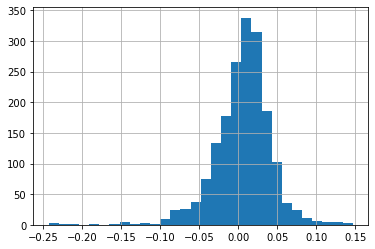

In [200]:
df['S&P500_4_Week_forward'].hist(bins=30)

In [201]:
df.shape

(1794, 23)

In [204]:
decline = -0.05
increase = 0.05
y_classificated = np.where(y>increase,1,np.where(y<decline,-1,0))

In [205]:
# Split the targets into training/testing sets
y_classificated_train = y_classificated[:-days_for_test]
y_classificated_test = y_classificated[-days_for_test:]

## Linear regression

In [19]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [20]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [22]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("R^2: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.0249914   0.0170196   0.0079718   0.06039355  0.07741204  0.0170185
 -0.08754153  0.00074665  0.00520626 -0.02391416 -0.03670073 -0.01278657
 -0.01791543 -0.05545424 -0.03753881]
MSE: 0.00
R^2: -0.04


In [23]:
regression_result = pd.DataFrame([features, list(regr.coef_)]).T
regression_result.columns = ['Feature','Coefficient']
regression_result.set_index('Feature')

,Coefficient
Feature,
Bullish,0.024991
Bearish,0.01702
Bull-Bear_Spread,0.007972
S&P500_Intraweek_spread,0.060394
S&P500_Weekly_High,0.077412
S&P500_Weekly_Low,0.017018
S&P500_Weekly_return,-0.087542
Bearish_8-week_MA,0.000747
Bullish_8-week_MA,0.005206


## Linear regression with p-value

In [24]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.375
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           0.000124
Time:                        17:31:56   Log-Likelihood:                 3815.9
No. Observations:                1594   AIC:                            -7608.
Df Residuals:                    1582   BIC:                            -7543.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.006      0.881      0.378      -0.006       0.016
x1             0.0250      0.013      1.906      0.057      -0.001       0.051
x2             0.0170      0.013      1.261      0.207      -0.009       0.043
x3             0.0080      0.004      2.087      0.037       0.000       0.015
x4             0.0604      0.039      1.561      0.119      -0.015       0.136
x5             0.0774      0.047      1.656      0.098      -0.014       0.169
x6             0.0170      0.043      0.398      0.691      -0.067       0.101
x7            -0.0875      0.036     -2.430      0.015      -0.158      -0.017
x8             0.0007      0.029      0.026      0.980      -0.056       0.058
x9             0.0052      0.026      0.200      0.841      -0.046       0.056
x10           -0.0239      0.029     -0.816      0.415      -0.081       0.034
x11           -0.0367      0.028     -1.295      0.195      -0.092       0.019
x12           -0.0128      0.007     -1.724      0.085      -0.027       0.002
x13           -0.0179      0.046     -0.391      0.696      -0.108       0.072
x14           -0.0555      0.075     -0.743      0.457      -0.202       0.091
x15           -0.0375      0.069     -0.547      0.584      -0.172       0.097
==============================================================================
Omnibus:                      338.828   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2016.251
Skew:                          -0.855   Prob(JB):                         0.00
Kurtosis:                       8.238   Cond. No.                     7.98e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.34e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* The R^2 of train

In [25]:
y_trained = regr.predict(X_train)
y_trained
print("R^2: %.2f" % r2_score(y_train, y_trained))

R^2: 0.02


that means the model is not flexible enough

## Desision tree

### The library that does not work :(

In [26]:
# # import dtreeviz
# from dtreeviz.trees import dtreeviz
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn import tree

In [27]:
# des_tree = DecisionTreeClassifier(random_state=1)

In [28]:
# viz = dtreeviz(des_tree, X_train, y_classificated_train,
#                 target_name="S&P 500 in 4 weeks",
#                 feature_names=features,
#                 class_names=list(features))
# viz

### Another not working library

In [29]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn import tree

In [30]:
# # Fit the regressor, set max_depth = 4
# des_tree = DecisionTreeRegressor(max_depth=4, random_state=6)
# model = des_tree.fit(X_train, y_train)

In [31]:
# text_representation = tree.export_text(regr)
# text_representation

In [32]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(regr, feature_names=features, filled=True)

### The third option 

In [101]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=4, max_depth=4, min_samples_leaf=2)
clf = clf.fit(X_train, y_classificated_train)

[Text(0.5, 0.9, 'X[6] <= -0.029\ngini = 0.198\nsamples = 1594\nvalue = [57, 1422, 115]'),
 Text(0.25, 0.7, 'X[6] <= -0.048\ngini = 0.543\nsamples = 113\nvalue = [11, 67, 35]'),
 Text(0.125, 0.5, 'X[3] <= 0.025\ngini = 0.619\nsamples = 37\nvalue = [6, 14, 17]'),
 Text(0.0625, 0.3, 'X[0] <= 0.296\ngini = 0.469\nsamples = 8\nvalue = [3, 5, 0]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.1875, 0.3, 'X[8] <= 0.294\ngini = 0.549\nsamples = 29\nvalue = [3, 9, 17]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.21875, 0.1, 'gini = 0.524\nsamples = 27\nvalue = [3, 7, 17]'),
 Text(0.375, 0.5, 'X[7] <= 0.361\ngini = 0.453\nsamples = 76\nvalue = [5, 53, 18]'),
 Text(0.3125, 0.3, 'X[0] <= 0.226\ngini = 0.291\nsamples = 48\nvalue = [3, 40, 5]'),
 Text(0.28125, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.34375, 0.1, 'gini = 0.234\nsamples = 46\nvalue = [2, 

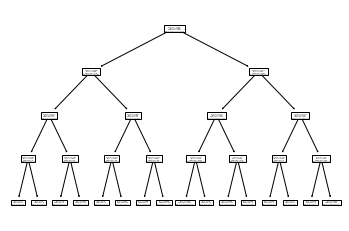

In [102]:
tree.plot_tree(clf)

In [103]:
from sklearn.tree import export_text

In [104]:
r = export_text(clf, feature_names=features)
print(r)

|--- S&P500_Weekly_return <= -0.03
|   |--- S&P500_Weekly_return <= -0.05
|   |   |--- S&P500_Intraweek_spread <= 0.02
|   |   |   |--- Bullish <= 0.30
|   |   |   |   |--- class: 0
|   |   |   |--- Bullish >  0.30
|   |   |   |   |--- class: -1
|   |   |--- S&P500_Intraweek_spread >  0.02
|   |   |   |--- Bullish_8-week_MA <= 0.29
|   |   |   |   |--- class: 0
|   |   |   |--- Bullish_8-week_MA >  0.29
|   |   |   |   |--- class: 1
|   |--- S&P500_Weekly_return >  -0.05
|   |   |--- Bearish_8-week_MA <= 0.36
|   |   |   |--- Bullish <= 0.23
|   |   |   |   |--- class: -1
|   |   |   |--- Bullish >  0.23
|   |   |   |   |--- class: 0
|   |   |--- Bearish_8-week_MA >  0.36
|   |   |   |--- S&P500_Intraweek_spread_4-week_MA <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- S&P500_Intraweek_spread_4-week_MA >  0.01
|   |   |   |   |--- class: 1
|--- S&P500_Weekly_return >  -0.03
|   |--- S&P500_Weekly_High_4-week_MA <= 0.01
|   |   |--- Bearish_4-week_MA <= 0.40
|   |   |   |--- S&P5

In [105]:
y_pred = clf.predict(X_test)

In [106]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_classificated_test, y_pred))

Accuracy: 0.86


In [107]:
precision_tree = metrics.precision_score(y_classificated_test, y_pred, average=None)
print("Precision:", precision_tree)

Precision: [0.         0.89839572 0.33333333]


In [108]:
recall_tree = metrics.recall_score(y_classificated_test, y_pred, average=None)
print("Recall:", recall_tree)

Recall: [0.         0.96       0.28571429]


In [99]:
y_classificated_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  1,  0,  0,  1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  1,
        0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0, -1,  0, -1,  1,  0,  0,  0, -1,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0])

In [100]:
y_pred

array([-1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,
        0, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1, -1,  1,  1,
        0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
        0, -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1, -1, -1, -1, -1,  0,  0,  0,
        0,  0, -1, -1, -1, -1,  0,  0,  1, -1, -1, -1,  0])

### Viz the tree

In [69]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = features,class_names=['3','4','5'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

### Grid search for the tree

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [131]:
# hyperparameter tuning
def grid_search():
    param_grid = {
        'max_depth': [2,3],
        'min_samples_leaf': [6, 8 ,10],
        'class_weight': [
                         {-1: 3, 0: 2, 1:3},
                         {-1: 2, 0: 1, 1:2},
                         {-1: 7, 0: 1, 1:5}
                        ]
    }
    
    clf = tree.DecisionTreeClassifier(random_state=4)
    search = RandomizedSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=3)
    search.fit(X_train,y_classificated_train)

    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

In [132]:
start = time.time()

grid_search()

end = time.time()
print('execution time in minutes: ', (end - start)/60) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter (CV score=0.891):
{'min_samples_leaf': 8, 'max_depth': 2, 'class_weight': {-1: 3, 0: 2, 1: 3}}
execution time in minutes:  0.07582662105560303


In [134]:
clf = tree.DecisionTreeClassifier(random_state=4, max_depth=2, min_samples_leaf=8, class_weight={-1: 3, 0: 2, 1: 3})
clf.fit(X_train,y_classificated_train)
y_pred = clf.predict(X_test)
precision_tree = metrics.precision_score(y_classificated_test, y_pred, average=None)
recall_tree = metrics.recall_score(y_classificated_test, y_pred, average=None)

C:\Users\User\anaconda3\envs\Investments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
precision_tree

array([0.        , 0.88265306, 0.25      ])

In [139]:
recall_tree

array([0.        , 0.98857143, 0.07142857])

## RandomForestClassifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 7)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [207]:
pipline = Pipeline(steps=[
    ('model', RandomForestClassifier())
])

Possible scorings: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [369]:
# hyperparameter tuning
def grid_search():
    param_grid = {
        'model__n_estimators': n_estimators,
        'model__max_features': max_features,
        'model__max_depth': max_depth,
        'model__min_samples_split': min_samples_split,
        'model__min_samples_leaf': min_samples_leaf,
        'model__bootstrap': bootstrap
    }
    global search
    global scoring
    scoring = 'f1_macro'
    search = RandomizedSearchCV(pipline, param_grid, cv=5, n_jobs=-1, verbose=3, scoring=scoring)
    search.fit(X_train,y_classificated_train)

    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

In [370]:
start = time.time()

grid_search()

end = time.time()
print('execution time in minutes: ', (end - start)/60)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter (CV score=0.334):
{'model__n_estimators': 1000, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 6, 'model__bootstrap': False}
execution time in minutes:  0.959639596939087


In [371]:
optimal_parameters = search.best_params_.copy()
optimal_parameters = pd.DataFrame([optimal_parameters])
optimal_parameters

,model__n_estimators,model__min_samples_split,model__min_samples_leaf,model__max_features,model__max_depth,model__bootstrap
0,1000,10,4,sqrt,6,False


In [372]:
rf = RandomForestClassifier(n_estimators=optimal_parameters['model__n_estimators'][0],
                            min_samples_split=optimal_parameters['model__min_samples_split'][0],
                            min_samples_leaf=optimal_parameters['model__min_samples_leaf'][0],
                            max_features=optimal_parameters['model__max_features'][0],
                            max_depth=optimal_parameters['model__max_depth'][0],
                            bootstrap=optimal_parameters['model__bootstrap'][0])
rf.fit(X_train,y_classificated_train)
y_pred = rf.predict(X_test)
precision_rf = metrics.precision_score(y_classificated_test, y_pred, average=None).round(3)
recall_rf = metrics.recall_score(y_classificated_test, y_pred, average=None).round(3)

C:\Users\User\anaconda3\envs\Investments\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [373]:
precision_rf

array([0.   , 0.852, 0.75 ])

In [374]:
recall_rf

array([0.   , 1.   , 0.167])

In [375]:
rf_results = search.best_params_.copy()
rf_results.update({'Scoring' : scoring,
                    'Precision' : precision_rf,
                   'Recall' : recall_rf,
                    'Target' : target,
                    'Range' : (decline, increase)})

In [376]:
current_rf_results = pd.DataFrame([rf_results])
current_rf_results

,model__n_estimators,model__min_samples_split,model__min_samples_leaf,model__max_features,model__max_depth,model__bootstrap,Scoring,Precision,Recall,Target,Range
0,1000,10,4,sqrt,6,False,f1_macro,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)"


In [377]:
past_rf_results = pd.read_pickle("rf_results.pkl")
past_rf_results

,model__n_estimators,model__min_samples_split,model__min_samples_leaf,model__max_features,model__max_depth,model__bootstrap,Precision,Recall,Target,Range,Scoring
0,621,5,4,auto,6,False,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",balanced_accuracy
1,410,5,4,sqrt,5,False,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",top_k_accuracy
2,873,10,4,sqrt,6,True,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",neg_brier_score
3,1000,10,4,sqrt,2,True,"[0.0, 0.835, 0.0]","[0.0, 1.0, 0.0]",S&P500_4_Week_forward,"(-0.05, 0.05)",precision
4,536,10,1,sqrt,2,False,"[0.0, 0.835, 0.0]","[0.0, 1.0, 0.0]",S&P500_4_Week_forward,"(-0.05, 0.05)",recall
5,957,10,1,sqrt,2,True,"[0.0, 0.835, 0.0]","[0.0, 1.0, 0.0]",S&P500_4_Week_forward,"(-0.05, 0.05)",roc_auc_ovo
6,284,5,1,sqrt,6,True,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",jaccard


In [378]:
pd.concat([past_rf_results, current_rf_results], ignore_index=True).to_pickle("./rf_results.pkl")

In [379]:
past_rf_results = pd.read_pickle("rf_results.pkl")
past_rf_results

,model__n_estimators,model__min_samples_split,model__min_samples_leaf,model__max_features,model__max_depth,model__bootstrap,Precision,Recall,Target,Range,Scoring
0,621,5,4,auto,6,False,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",balanced_accuracy
1,410,5,4,sqrt,5,False,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",top_k_accuracy
2,873,10,4,sqrt,6,True,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",neg_brier_score
3,1000,10,4,sqrt,2,True,"[0.0, 0.835, 0.0]","[0.0, 1.0, 0.0]",S&P500_4_Week_forward,"(-0.05, 0.05)",precision
4,536,10,1,sqrt,2,False,"[0.0, 0.835, 0.0]","[0.0, 1.0, 0.0]",S&P500_4_Week_forward,"(-0.05, 0.05)",recall
5,957,10,1,sqrt,2,True,"[0.0, 0.835, 0.0]","[0.0, 1.0, 0.0]",S&P500_4_Week_forward,"(-0.05, 0.05)",roc_auc_ovo
6,284,5,1,sqrt,6,True,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",jaccard
7,1000,10,4,sqrt,6,False,"[0.0, 0.852, 0.75]","[0.0, 1.0, 0.167]",S&P500_4_Week_forward,"(-0.05, 0.05)",f1_macro


In [ ]:
# What is the lose dor the 1 result false 